In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout

In [2]:
data = pd.read_csv("spotify-2023.csv",  encoding='ISO-8859-1', comment=None)

data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Check for successful conversion
print(data['streams'].head())  # Display the first few rows of the 'streams' column
print(data['streams'].dtypes)  # Confirm the data type is now numeric

# Handle missing values (if any were introduced during conversion)
data['streams'].fillna(data['streams'].mean(), inplace=True)
# Define features and target variable
numeric_features = [
    "artist_count", "released_year", 'bpm', 'danceability_%', 'valence_%', 
    'energy_%', 'acousticness_%', 'in_spotify_playlists', 'in_spotify_charts',
    'in_apple_playlists', 'in_apple_charts'
]
categorical_features = ["track_name", "mode", "key", "artist(s)_name"]

X = data[numeric_features + categorical_features]
y = data['streams']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0    141381703.0
1    133716286.0
2    140003974.0
3    800840817.0
4    303236322.0
Name: streams, dtype: float64
float64


In [3]:
# Preprocessing pipeline for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())                 # Scale numeric features
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Train Ridge Regression
ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['artist_count',
                                                   'released_year', 'bpm',
                                                   'danceability_%',
                                                   'valence_%', 'energy_%',
                                                   'acousticness_%',
                                                   'in_spotify_playlists',
                                                   'in_spotify_charts',
                                                   'in_apple_playlists',
                                                   'in_apple_charts']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['track_name', 'mode', 'key',
                                                   'artist(s)_name'])])),
                ('model', Ridge())])

In [5]:
# Predict and Evaluate
ridge_pred = ridge_pipeline.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge Regression: RMSE={ridge_rmse:.2f}, R^2={ridge_r2:.2f}")

Ridge Regression: RMSE=266726597.71, R^2=0.74


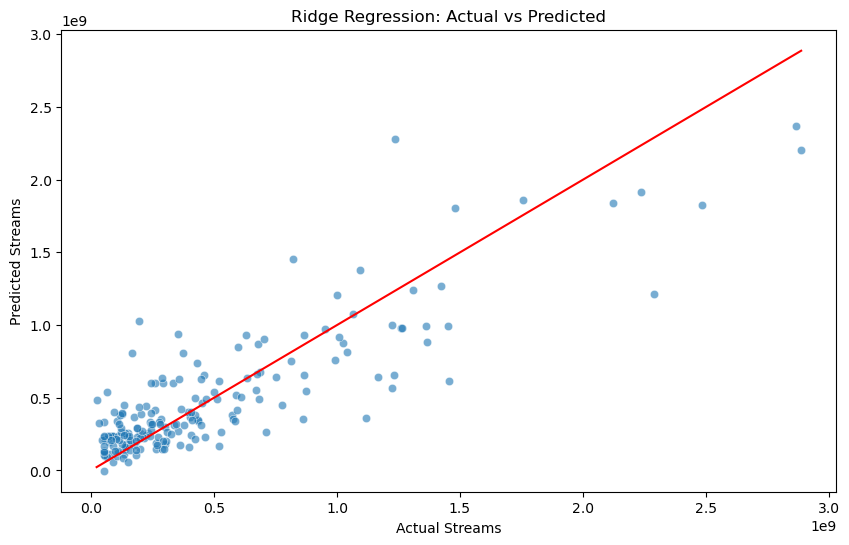

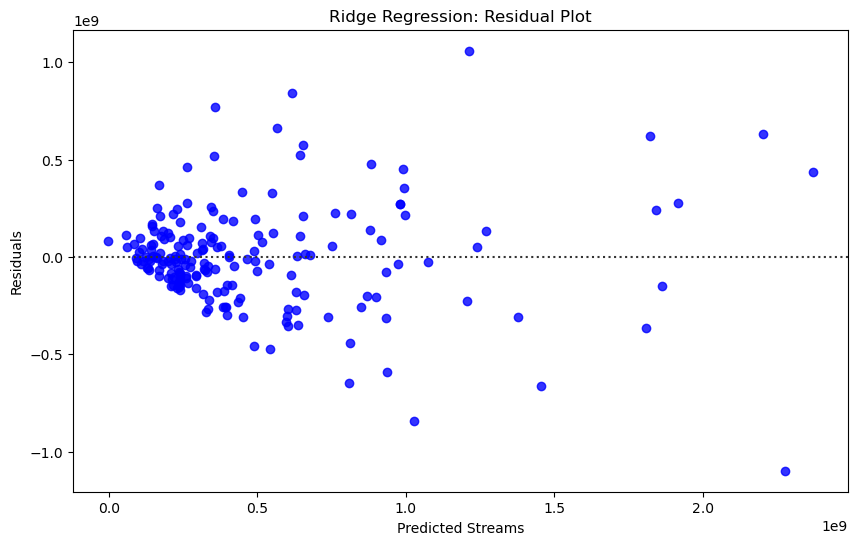

In [6]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=ridge_pred, alpha=0.6)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red')
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.show()

# Residual Plot
residuals = y_test - ridge_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=ridge_pred, y=residuals, color="blue")
plt.title('Ridge Regression: Residual Plot')
plt.xlabel('Predicted Streams')
plt.ylabel('Residuals')
plt.show()

In [7]:
# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train Random Forest
rf_pipeline.fit(X_train, y_train)

# Predict and Evaluate
rf_pred = rf_pipeline.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest: RMSE={rf_rmse:.2f}, R^2={rf_r2:.2f}")

Random Forest: RMSE=227655006.55, R^2=0.81


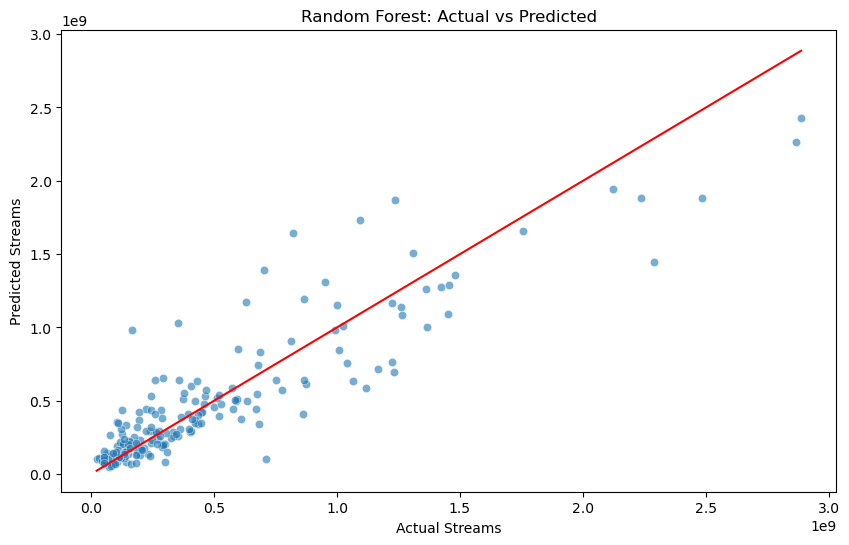

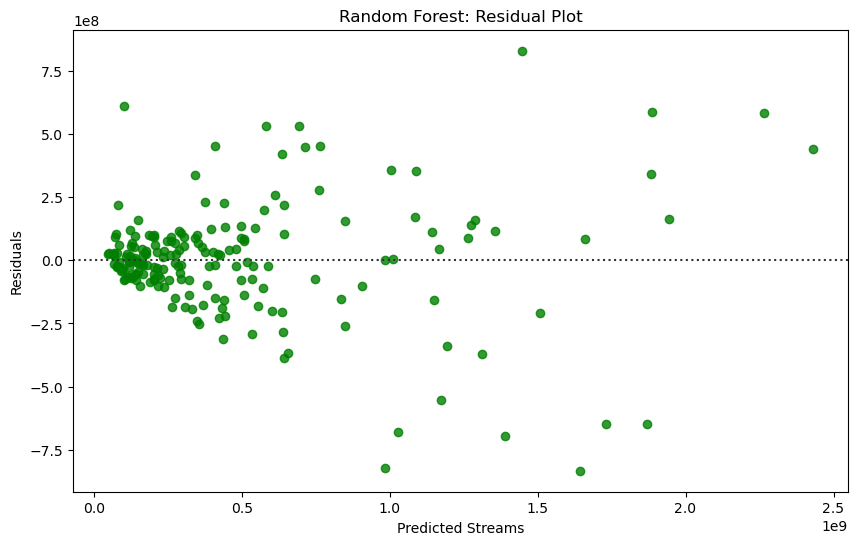

In [8]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_pred, alpha=0.6)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.show()

# Residual Plot
residuals = y_test - rf_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=rf_pred, y=residuals, color="green")
plt.title('Random Forest: Residual Plot')
plt.xlabel('Predicted Streams')
plt.ylabel('Residuals')
plt.show()

In [9]:
# SVR Pipeline
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='rbf'))
])

# Train SVR Model
svr_pipeline.fit(X_train, y_train)
svr_pred = svr_pipeline.predict(X_test)

# Evaluate SVR Model
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
svr_r2 = r2_score(y_test, svr_pred)
print(f"SVR: RMSE={svr_rmse:.2f}, R^2={svr_r2:.2f}")

SVR: RMSE=553828846.54, R^2=-0.13


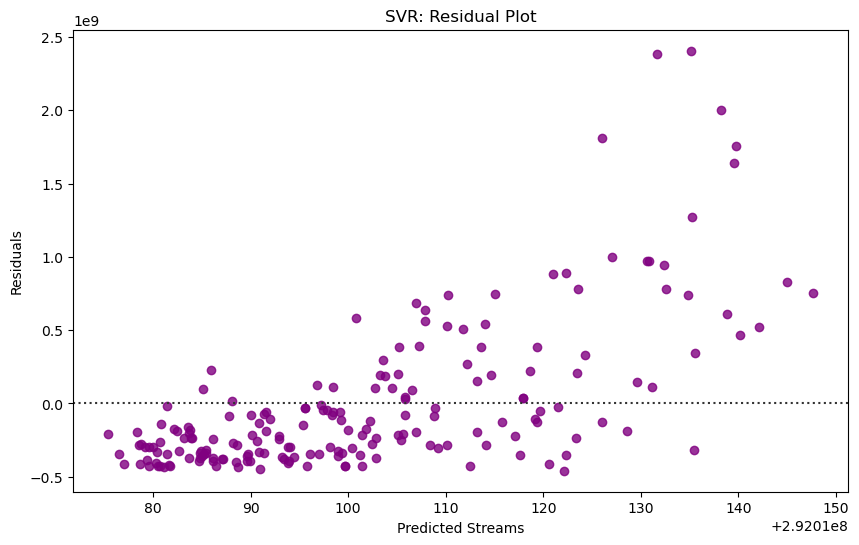

In [10]:
# Residual Plot for SVR Regressor
svr_residuals = y_test - svr_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=svr_pred, y=svr_residuals, color="purple")
plt.title('SVR: Residual Plot')
plt.xlabel('Predicted Streams')
plt.ylabel('Residuals')
plt.show()

k-NN: RMSE=306418287.82, R^2=0.65


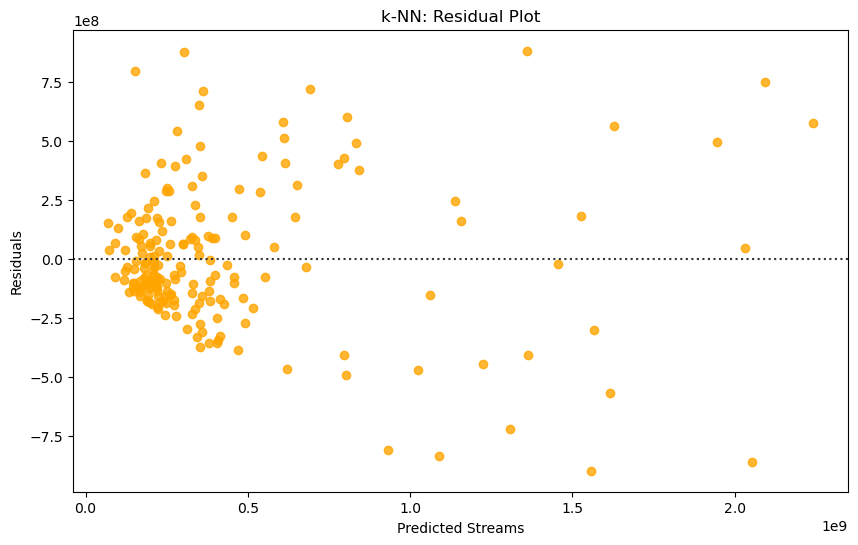

In [11]:
# k-NN Pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor(n_neighbors=5))
])

# Train k-NN Model
knn_pipeline.fit(X_train, y_train)
knn_pred = knn_pipeline.predict(X_test)

# Evaluate k-NN Model
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
knn_r2 = r2_score(y_test, knn_pred)
print(f"k-NN: RMSE={knn_rmse:.2f}, R^2={knn_r2:.2f}")

# Residual Plot for k-NN Regressor
knn_residuals = y_test - knn_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=knn_pred, y=knn_residuals, color="orange")
plt.title('k-NN: Residual Plot')
plt.xlabel('Predicted Streams')
plt.ylabel('Residuals')
plt.show()

Epoch 1/50
20/20 [==============================] - 1s 14ms/step - loss: 587340557299220480.0000 - mae: 513571136.0000 - val_loss: 678615484286894080.0000 - val_mae: 557491392.0000
Epoch 2/50
20/20 [==============================] - 0s 8ms/step - loss: 587340557299220480.0000 - mae: 513571104.0000 - val_loss: 678615484286894080.0000 - val_mae: 557491392.0000
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 587340488579743744.0000 - mae: 513571104.0000 - val_loss: 678615484286894080.0000 - val_mae: 557491392.0000
Epoch 4/50
20/20 [==============================] - 0s 6ms/step - loss: 587340488579743744.0000 - mae: 513571040.0000 - val_loss: 678615484286894080.0000 - val_mae: 557491392.0000
Epoch 5/50
20/20 [==============================] - 0s 7ms/step - loss: 587340557299220480.0000 - mae: 513570976.0000 - val_loss: 678615346847940608.0000 - val_mae: 557491328.0000
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 587340419860267008.0000 - m

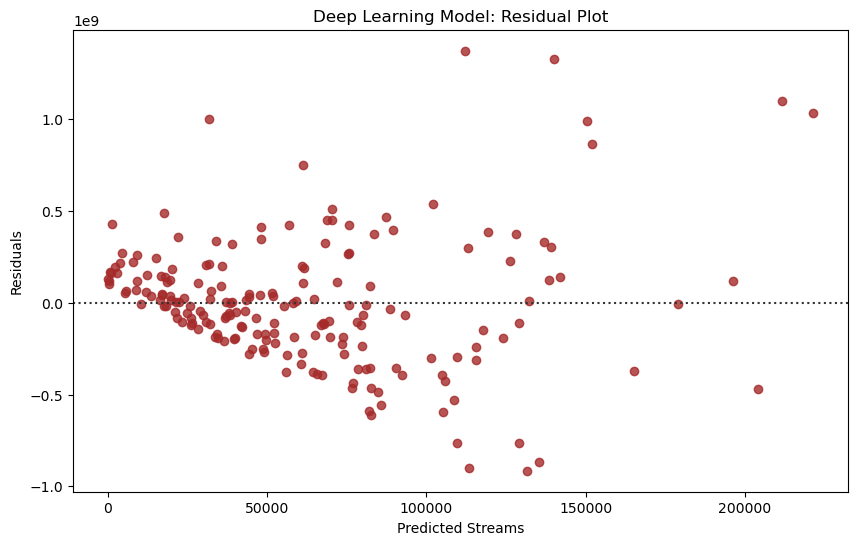

In [12]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_deep_learning_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1)  # Output layer for regression task
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Preprocess data for deep learning (convert sparse to dense arrays if necessary)
X_train_processed = preprocessor.fit_transform(X_train).toarray()
X_test_processed = preprocessor.transform(X_test).toarray()

dl_model = build_deep_learning_model(X_train_processed.shape[1])
history = dl_model.fit(
    X_train_processed,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1,
)

dl_predictions = dl_model.predict(X_test_processed).flatten()

# Evaluate Deep Learning Model Performance
dl_rmse = np.sqrt(mean_squared_error(y_test, dl_predictions))
dl_r2 = r2_score(y_test, dl_predictions)
print(f"Deep Learning Model: RMSE={dl_rmse:.2f}, R^2={dl_r2:.2f}")

# Residual Plot for Deep Learning Model
dl_residuals = y_test - dl_predictions
plt.figure(figsize=(10, 6))
sns.residplot(x=dl_predictions, y=dl_residuals, color="brown")
plt.title('Deep Learning Model: Residual Plot')
plt.xlabel('Predicted Streams')
plt.ylabel('Residuals')
plt.show()

In [13]:
import time
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a dictionary to store performance metrics
performance_metrics = {
    "Model": [],
    "RMSE": [],
    "R^2": [],
    "Training Time (s)": []
}

# Function to measure training time and evaluate model
def evaluate_model(pipeline, X_train, y_train, X_test, y_test, model_name):
    start_time = time.time()
    pipeline.fit(X_train, y_train)  # Train the model
    training_time = time.time() - start_time  # Calculate training time
    
    predictions = pipeline.predict(X_test)  # Predict on test set
    rmse = np.sqrt(mean_squared_error(y_test, predictions))  # Calculate RMSE
    r2 = r2_score(y_test, predictions)  # Calculate R^2
    
    # Append results to performance metrics
    performance_metrics["Model"].append(model_name)
    performance_metrics["RMSE"].append(rmse)
    performance_metrics["R^2"].append(r2)
    performance_metrics["Training Time (s)"].append(training_time)

# Evaluate Ridge Regression
evaluate_model(ridge_pipeline, X_train, y_train, X_test, y_test, "Ridge Regression")

# Evaluate Random Forest Regressor
evaluate_model(rf_pipeline, X_train, y_train, X_test, y_test, "Random Forest")

# Evaluate Support Vector Regressor (SVR)
evaluate_model(svr_pipeline, X_train, y_train, X_test, y_test, "SVR")

# Evaluate k-Nearest Neighbors (k-NN)
evaluate_model(knn_pipeline, X_train, y_train, X_test, y_test, "k-NN")

# Deep Learning Model Evaluation (separate since it doesn't use a pipeline)
start_time = time.time()
dl_model.fit(X_train_processed, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0)  # Train DL model
training_time_dl = time.time() - start_time

dl_predictions = dl_model.predict(X_test_processed).flatten()  # Predict on test set
dl_rmse = np.sqrt(mean_squared_error(y_test, dl_predictions))  # Calculate RMSE
dl_r2 = r2_score(y_test, dl_predictions)  # Calculate R^2

# Append Deep Learning results to performance metrics
performance_metrics["Model"].append("Deep Learning")
performance_metrics["RMSE"].append(dl_rmse)
performance_metrics["R^2"].append(dl_r2)
performance_metrics["Training Time (s)"].append(training_time_dl)

# Convert performance metrics to a DataFrame for easy analysis
metrics_df = pd.DataFrame(performance_metrics)
print(metrics_df)

6/6 [==============================] - 0s 2ms/step
              Model          RMSE       R^2  Training Time (s)
0  Ridge Regression  2.667266e+08  0.737410           0.034747
1     Random Forest  2.276550e+08  0.808706           6.519251
2               SVR  5.538288e+08 -0.132132           0.062135
3              k-NN  3.064183e+08  0.653442           0.021374
4     Deep Learning  7.087787e+08 -0.854246           1.280695


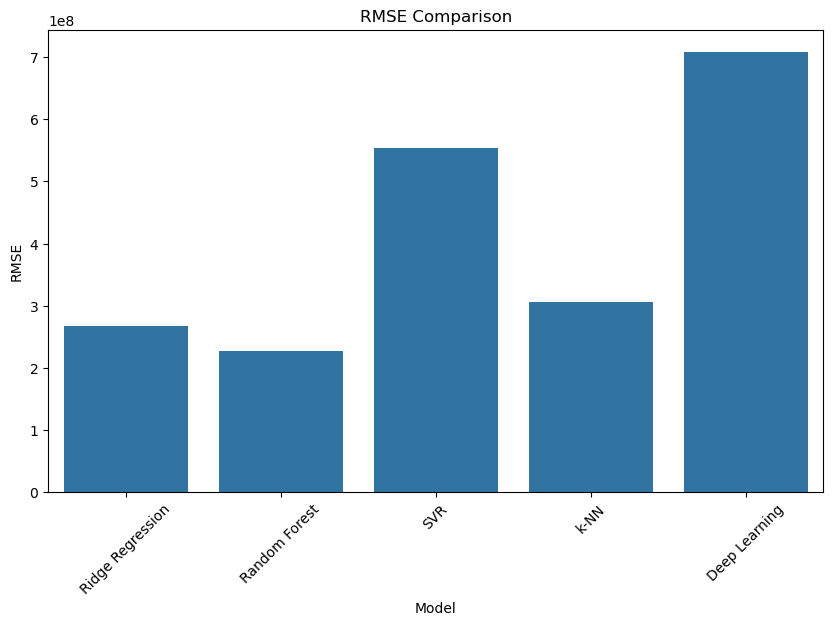

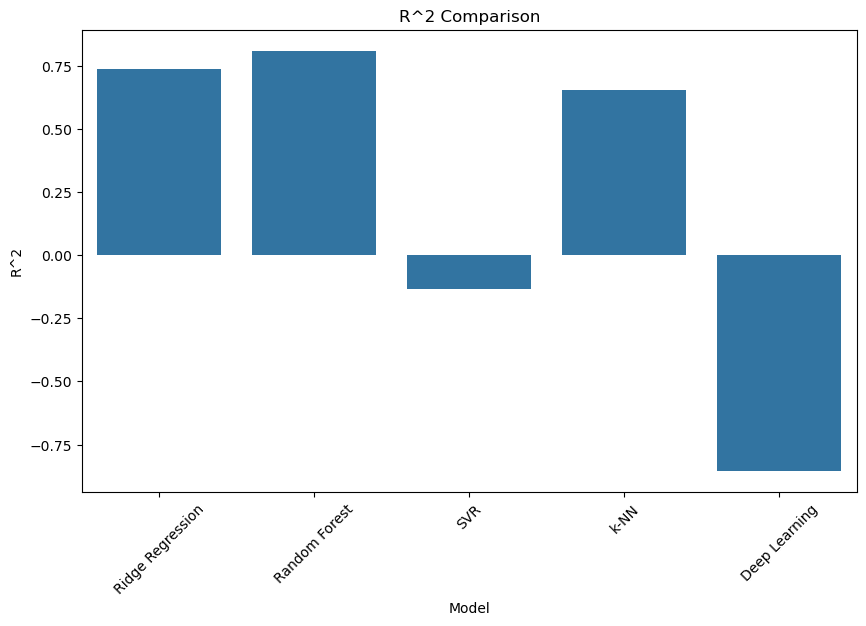

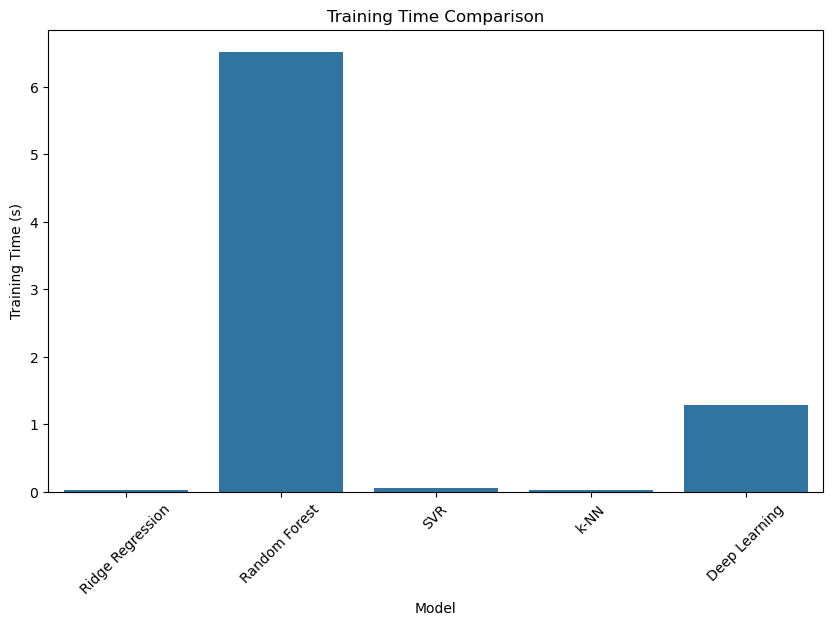

In [14]:
# Plot RMSE for each model
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="RMSE", data=metrics_df)
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

# Plot R^2 for each model
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R^2", data=metrics_df)
plt.title("R^2 Comparison")
plt.ylabel("R^2")
plt.xlabel("Model") 
plt.xticks(rotation=45)
plt.show()

# Plot Training Time for each model
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Training Time (s)", data=metrics_df)
plt.title("Training Time Comparison") 
plt.ylabel("Training Time (s)") 
plt.xlabel("Model") 
plt.xticks(rotation=45) 
plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # Input layer
    model.add(Dense(units=hp.Int('units_input', min_value=64, max_value=256, step=64), 
                    activation='relu', input_shape=(X_train_processed.shape[1],)))
    
    # Hidden layers
    for i in range(hp.Int('num_hidden_layers', 1, 3)):  # Tune number of hidden layers (1 to 3)
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=64, max_value=256, step=64), 
                        activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))  # Tune dropout rate
    
    # Output layer
    model.add(Dense(1))  # Regression output
    
    # Compile the model with tunable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='mse',
        metrics=['mae']
    )
    
    return model


In [16]:
from keras_tuner import RandomSearch

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mae',  # Minimize validation MAE (Mean Absolute Error)
    max_trials=10,        # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Average results over multiple runs for each trial
    directory='hyperparameter_tuning',
    project_name='deep_learning_tuning'
)

# Run the hyperparameter search
tuner.search(X_train_processed, y_train, epochs=50, validation_split=0.2, batch_size=32)

# Get the best hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best Hyperparameters:
- Units in Input Layer: {best_hps.get('units_input')}
- Number of Hidden Layers: {best_hps.get('num_hidden_layers')}
- Dropout Rates: {[best_hps.get(f'dropout_{i}') for i in range(best_hps.get('num_hidden_layers'))]}
- Learning Rate: {best_hps.get('learning_rate')}
""")


INFO:tensorflow:Reloading Tuner from hyperparameter_tuning\deep_learning_tuning\tuner0.json
INFO:tensorflow:Oracle triggered exit

Best Hyperparameters:
- Units in Input Layer: 128
- Number of Hidden Layers: 3
- Dropout Rates: [0.4, 0.2, 0.2]
- Learning Rate: 0.006237165665405998



In [17]:
# Build the best model using optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model on full training data
history = best_model.fit(
    X_train_processed,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

# Evaluate on test data
test_loss, test_mae = best_model.evaluate(X_test_processed, y_test)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")


Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 587340419860267008.0000 - mae: 513570912.0000 - val_loss: 678613285263638528.0000 - val_mae: 557490112.0000
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 587312794630619136.0000 - mae: 513553760.0000 - val_loss: 678470623629934592.0000 - val_mae: 557408640.0000
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 586677895385055232.0000 - mae: 513186496.0000 - val_loss: 676365058862743552.0000 - val_mae: 556228160.0000
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 580824713954066432.0000 - mae: 509733856.0000 - val_loss: 662099788845547520.0000 - val_mae: 548202304.0000
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 551167415019372544.0000 - mae: 491794368.0000 - val_loss: 599692333486702592.0000 - val_mae: 512408384.0000
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 457365329274732544.00

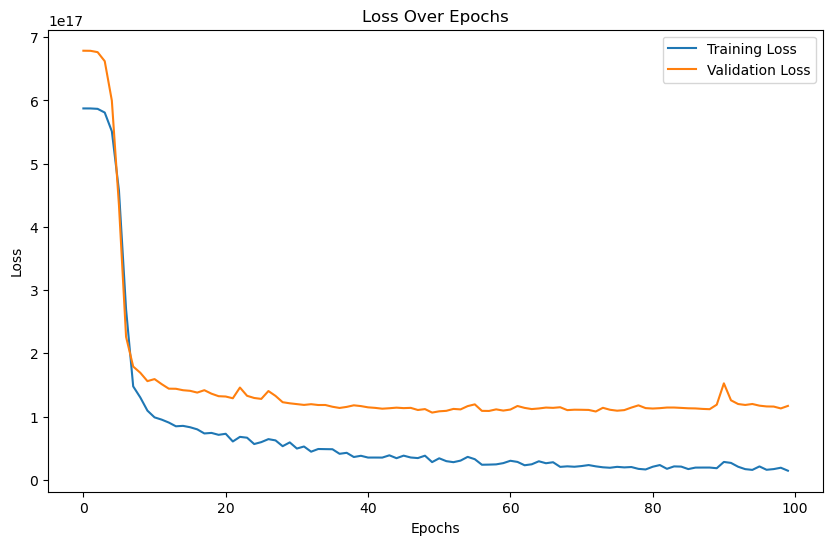

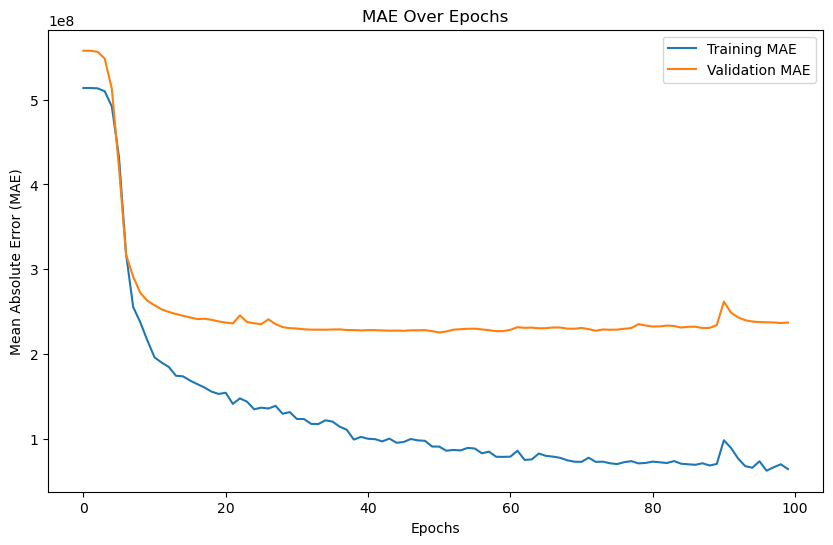

In [18]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation MAE over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.show()


c:\Users\emmao\anaconda3\envs\final\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


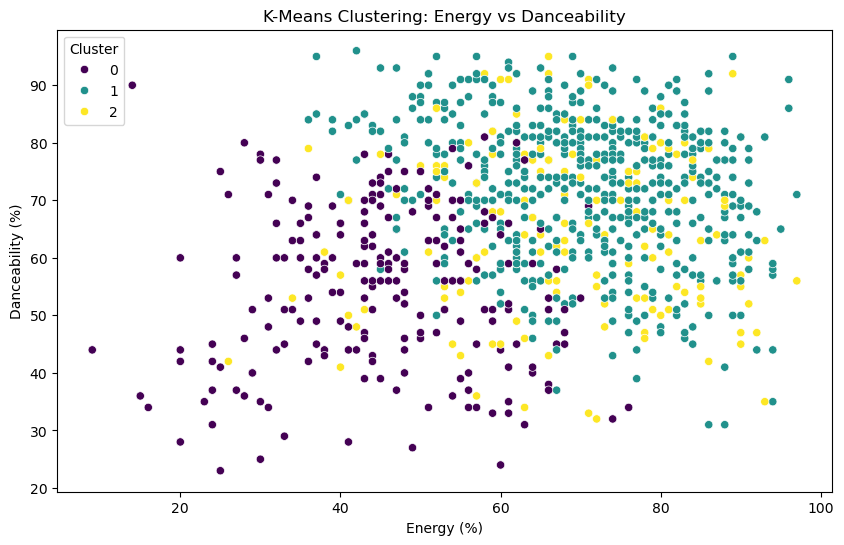

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numeric features for clustering
clustering_features = [
    "artist_count", "released_year", "bpm", "danceability_%", "valence_%",
    "energy_%", "acousticness_%", "in_spotify_playlists", "in_spotify_charts",
    "in_apple_playlists", "in_apple_charts"
]

# Scale the features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[clustering_features])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose 3 clusters as an example
data['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters using a scatter plot (e.g., energy vs danceability)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['energy_%'], y=data['danceability_%'], hue=data['cluster'], palette='viridis'
)
plt.title("K-Means Clustering: Energy vs Danceability")
plt.xlabel("Energy (%)")
plt.ylabel("Danceability (%)")
plt.legend(title="Cluster")
plt.show()


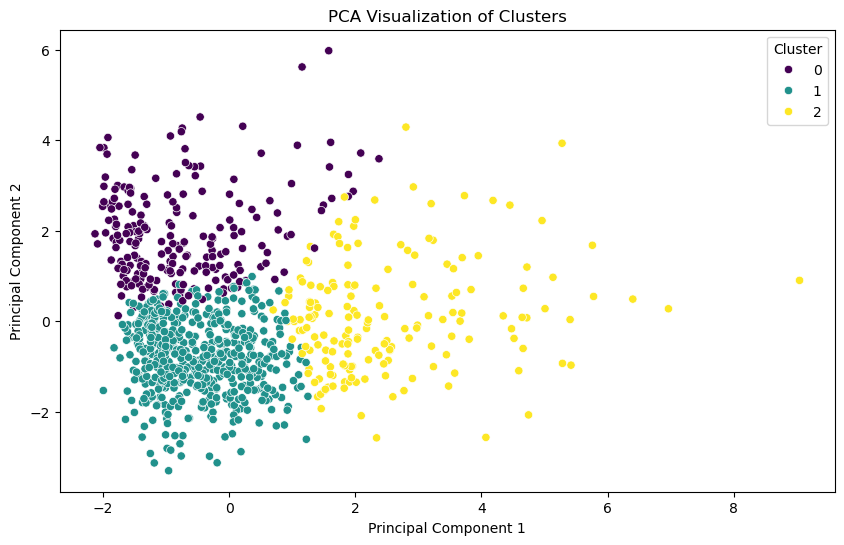

In [20]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Add PCA results to the dataset
data['pca_1'] = pca_result[:, 0]
data['pca_2'] = pca_result[:, 1]

# Visualize clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['pca_1'], y=data['pca_2'], hue=data['cluster'], palette='viridis'
)
plt.title("PCA Visualization of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


4/4 [==============================] - 0s 3ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

7707/7707 [==============================] - 10s 1ms/step


IndexError: list index out of range

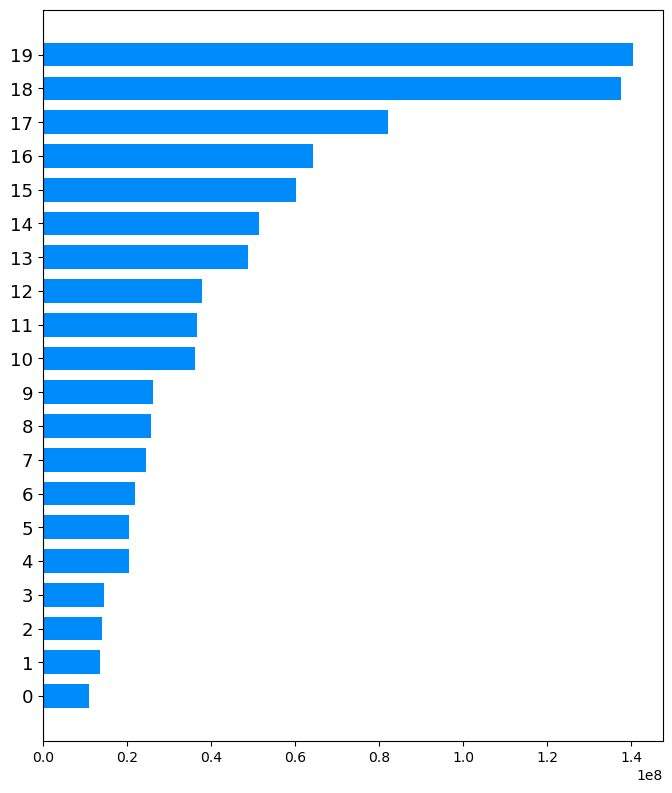

In [21]:
import shap

# Use SHAP to explain the deep learning model
explainer = shap.KernelExplainer(best_model.predict, X_train_processed[:100])  # Use a subset for efficiency
shap_values = explainer.shap_values(X_test_processed[:100])  # Explain a subset of test data

# Summary plot of SHAP values (global interpretability)
shap.summary_plot(shap_values, X_test_processed[:100], feature_names=numeric_features + categorical_features)

# Force plot for a single prediction (local interpretability)
shap.force_plot(
    explainer.expected_value[0],
    shap_values[0][0],
    X_test_processed[0],
    feature_names=numeric_features + categorical_features
)
